In [2]:
%matplotlib inline

In [3]:
from utils import get_classifier, get_binetflow_files, get_saved_data, \
get_feature_labels, get_feature_order
import numpy as np
import matplotlib.pyplot as plt


binet_files = get_binetflow_files()

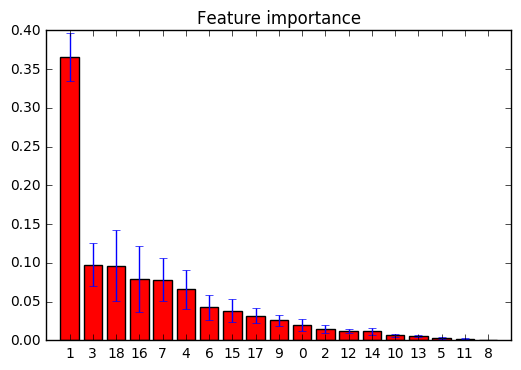

Key
1 background_flow_count
3 avg_duration
18 n_tcp
16 n_dports<1024
7 n_conn
4 n_s_b_p_address
6 n_sports>1024
15 normal_flow_count
17 n_d_b_p_address
9 n_udp
0 n_dports>1024
2 n_s_a_p_address
12 n_d_a_p_address
14 n_d_c_p_address
10 n_icmp
13 n_s_c_p_address
5 n_sports<1024
11 n_d_na_p_address
8 n_s_na_p_address


In [3]:

rf = get_classifier('rf')
feature, label = get_feature_labels(get_saved_data(0.15, binet_files[-1]))

rf.fit(feature, label)

importances = rf.feature_importances_

std = np.std([t.feature_importances_ for t in rf.estimators_],
            axis=0)

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importance")
plt.bar(range(feature.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(feature.shape[1]), indices)
plt.xlim([-1, feature.shape[1]])
plt.show()

orders = get_feature_order()
print("Key")
for i in indices:
    print(i, orders[i])


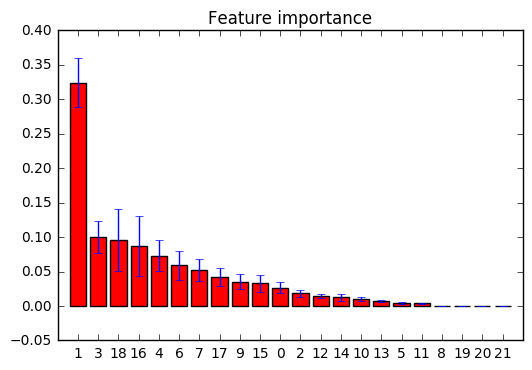

In [5]:

feature, label = get_feature_labels(get_saved_data(0.15, binet_files[-1], v2=True), v2=True)
rf.fit(feature, label)

importances = rf.feature_importances_

std = np.std([t.feature_importances_ for t in rf.estimators_],
            axis=0)

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importance")
plt.bar(range(feature.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(feature.shape[1]), indices)
plt.xlim([-1, feature.shape[1]])
plt.show()

0 n_dports>1024
1 background_flow_count
2 n_s_a_p_address
3 avg_duration
4 n_s_b_p_address
5 n_sports<1024
6 n_sports>1024
7 n_conn
8 n_s_na_p_address
9 n_udp
10 n_icmp
11 n_d_na_p_address
12 n_d_a_p_address
13 n_s_c_p_address
14 n_d_c_p_address
15 normal_flow_count
16 n_dports<1024
17 n_d_b_p_address
18 n_tcp
Accuracy: 0.9491, Precision: 0.9863, Recall: 0.4677


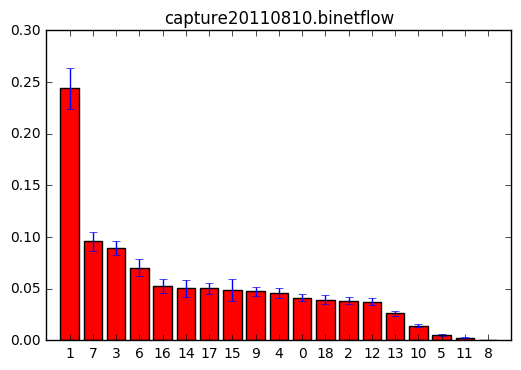

Accuracy: 0.9492, Precision: 0.9759, Recall: 0.4594


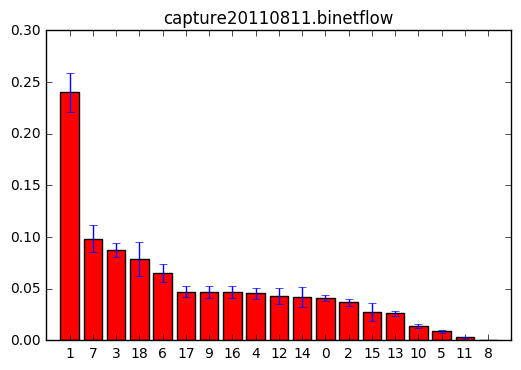

Accuracy: 0.9977, Precision: 0.9963, Recall: 0.9064


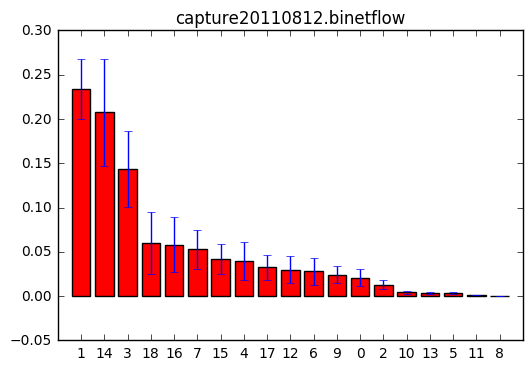

Accuracy: 0.9865, Precision: 0.9839, Recall: 0.1315


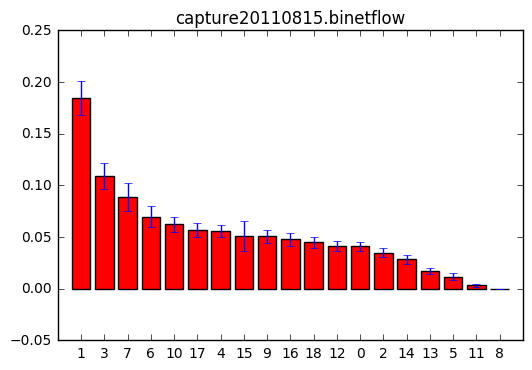

Accuracy: 0.9449, Precision: 0.9630, Recall: 0.2105


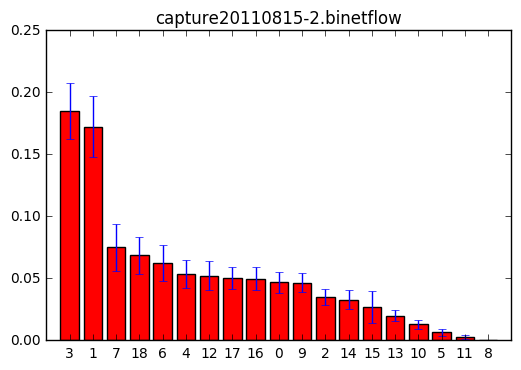

Accuracy: 0.9894, Precision: 1.0000, Recall: 0.3939


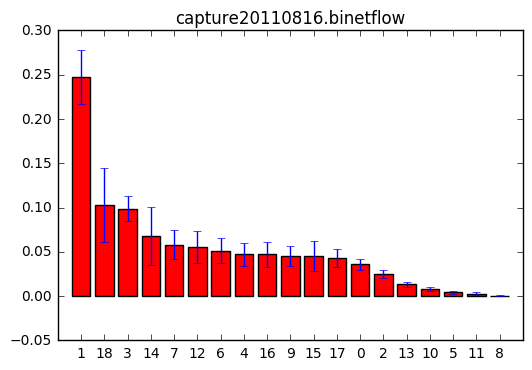

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.9968, Precision: 0.0000, Recall: 0.0000


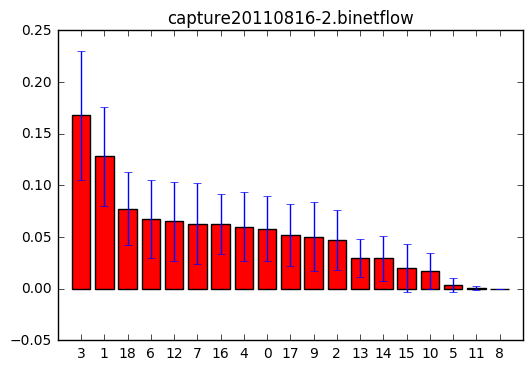

Accuracy: 0.9972, Precision: 0.9942, Recall: 0.5845


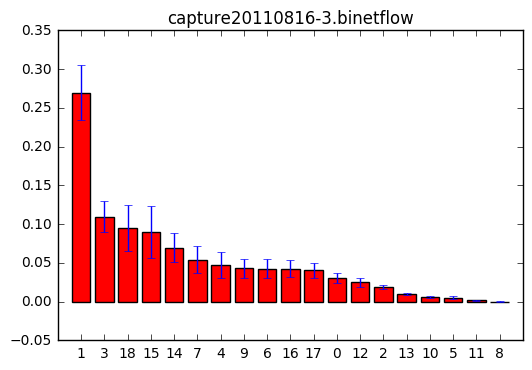

Accuracy: 0.9494, Precision: 0.9517, Recall: 0.9209


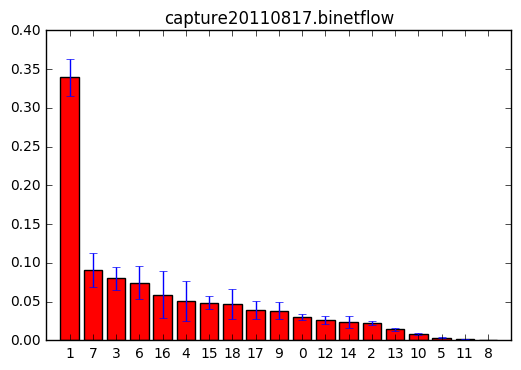

Accuracy: 0.9921, Precision: 0.9801, Recall: 0.8132


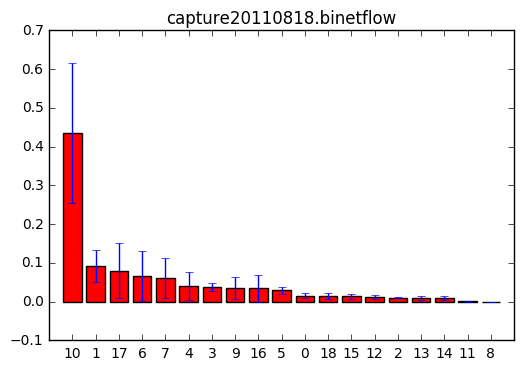

Accuracy: 0.9770, Precision: 0.9750, Recall: 0.7548


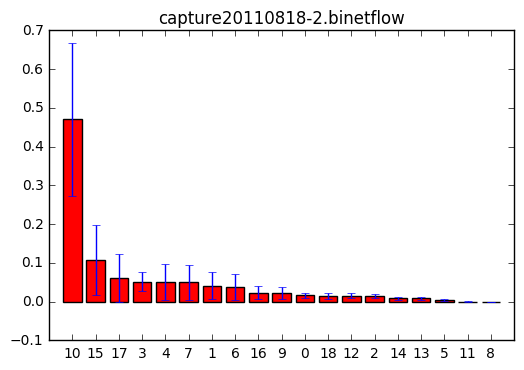

Accuracy: 0.9743, Precision: 0.9853, Recall: 0.2310


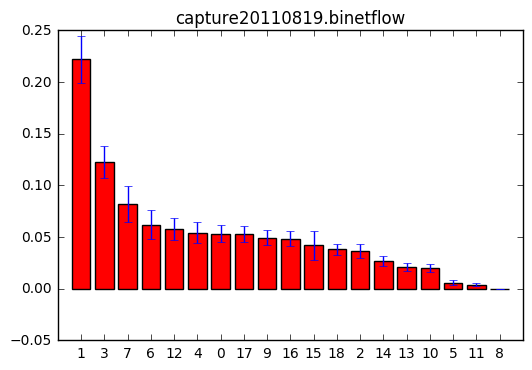

Accuracy: 0.9887, Precision: 0.9973, Recall: 0.8787


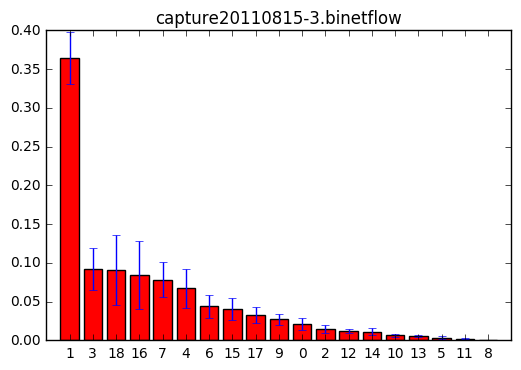

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def rf_feature_importance(bfile):
    rf = get_classifier('rf')
    feature, label = get_feature_labels(get_saved_data(0.15, bfile))
    xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size=0.3, random_state=42)
    
    rf.fit(feature, label)

    importances = rf.feature_importances_
    std = np.std([t.feature_importances_ for t in rf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    
    rf.fit(xtrain, ytrain)
    predicted = rf.predict(xtest)
    
    print("Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}".format(
        accuracy_score(ytest, predicted), precision_score(ytest, predicted), 
        recall_score(ytest, predicted)))

    plt.figure()
    plt.title("Feature importance")
    plt.bar(range(feature.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(feature.shape[1]), indices)
    plt.xlim([-1, feature.shape[1]])
    plt.title(bfile)
    plt.show()

for i, o in enumerate(get_feature_order()):
    print(i, o)
    
for b in binet_files:
    rf_feature_importance(b)

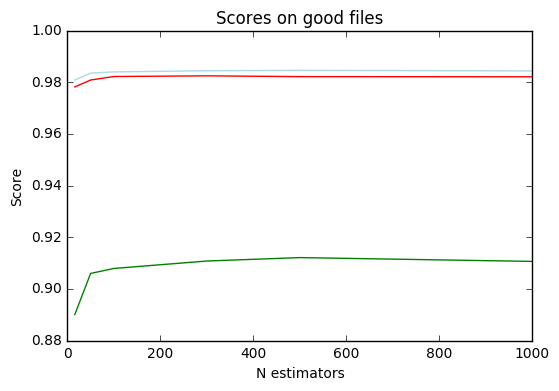

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

def plot_rf_on(xtrain, xtest, ytrain, ytest, title="Scores"):
    estimators = [16, 50, 100, 300, 500, 1000]
    acc = []
    prec = []
    rec = []
    for estimator in estimators:
        rf = RandomForestClassifier(n_estimators=estimator, criterion='entropy')
        rf.fit(xtrain, ytrain)
        predicted = rf.predict(xtest)
        acc.append(accuracy_score(ytest, predicted))
        prec.append(precision_score(ytest, predicted))
        rec.append(recall_score(ytest, predicted))
    plt.figure()
    plt.plot(estimators, acc, color='lightblue', label='accuracy')
    plt.plot(estimators, prec, color='red', label='precision')
    plt.plot(estimators, rec, color='green', label='recall')
    plt.xlabel('N estimators')
    plt.ylabel('Score')
    plt.title(title)
    plt.show()

best = [8, 9, 12]
summaries = []
for i in best:
    summaries += get_saved_data(0.15, binet_files[i])
feature, label = get_feature_labels(summaries)
del summaries
xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size=0.3, random_state=42)
plot_rf_on(xtrain, xtest, ytrain, ytest, title="Scores on good files")

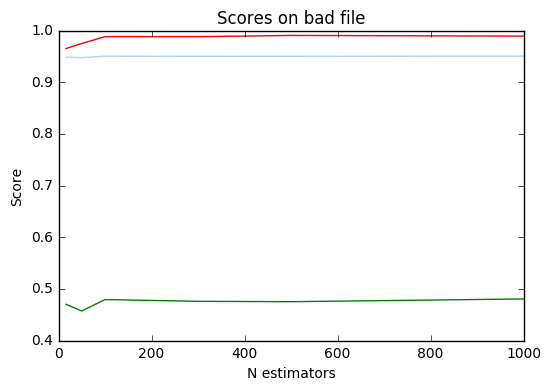

In [8]:
feature, label = get_feature_labels(get_saved_data(0.15, binet_files[0]))
xtrain, xtest, ytrain, ytest = train_test_split(feature, label, test_size=0.3, random_state=42)
plot_rf_on(xtrain, xtest, ytrain, ytest, title='Scores on bad file')